In [71]:
import joblib
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
X_test = pd.read_csv('../data/X_test.csv')
y_test = pd.read_csv('../data/y_test.csv')

In [73]:
logistic_model = joblib.load('../models/logistic_regression.pkl')
random_forest_model = joblib.load('../models/random_forest.pkl')

In [74]:
models = {
    'Logistic Regression': logistic_model,
    'Random Forest': random_forest_model
}

=== Logistic Regression ===
Accuracy: 0.7920
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        82
           1       0.69      0.72      0.70        43

    accuracy                           0.79       125
   macro avg       0.77      0.78      0.77       125
weighted avg       0.79      0.79      0.79       125



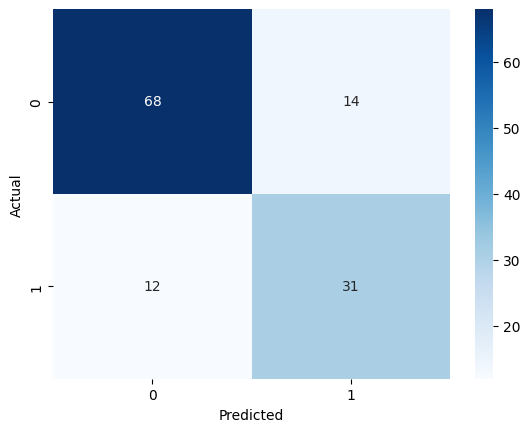

=== Random Forest ===
Accuracy: 0.8160
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.74      0.72      0.73        43

    accuracy                           0.82       125
   macro avg       0.80      0.79      0.80       125
weighted avg       0.82      0.82      0.82       125



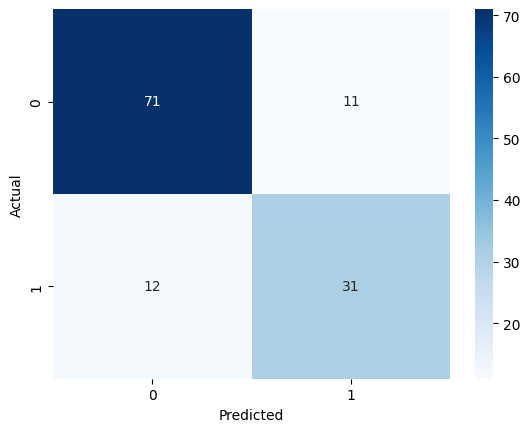

In [75]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'=== {name} ===')
    print(f'Accuracy: {acc:.4f}')
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [76]:
import sys
sys.path.append("../src")

from features import encoding, new_features, drop_features
from preprocessing import fill_missing_values, remove_outlier

In [77]:
unseen = pd.read_csv('../data/unseen.csv')
unseen

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [78]:
unseen.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [79]:
unseen = fill_missing_values(unseen)

c:\Users\66959\Desktop\data_sci_project\titanic-survival-ml\notebooks\../src\preprocessing.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
c:\Users\66959\Desktop\data_sci_project\titanic-survival-ml\notebooks\../src\preprocessing.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [80]:
unseen.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [81]:
unseen = new_features(unseen)
unseen = encoding(unseen)
unseen = drop_features(unseen)

In [82]:
unseen.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,1,1,False,True,False
1,3,1,47.0,1,0,7.0000,0,2,0,False,False,True
2,2,0,62.0,0,0,9.6875,0,1,1,False,True,False
3,3,0,27.0,0,0,8.6625,0,1,1,False,False,True
4,3,1,22.0,1,1,12.2875,0,3,0,False,False,True


In [83]:
unseen.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin',
       'FamilySize', 'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [84]:
unseen = unseen[['Pclass', 'Sex', 'Age', 'Fare',
       'HasCabin', 'FamilySize', 'Embarked_C',
       'Embarked_Q', 'Embarked_S']]

In [85]:
ans1 = logistic_model.predict(unseen)
ans2 = random_forest_model.predict(unseen)

In [86]:
ans1.shape

(418,)

In [87]:
passengerId = pd.read_csv('../data/unseen.csv')['PassengerId']
passengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [88]:
ans1 = pd.DataFrame({'PassengerId': passengerId, 'Survived': ans1})
ans2 = pd.DataFrame({'PassengerId': passengerId, 'Survived': ans2})

In [89]:
ans1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [90]:
ans2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [91]:
ans1.to_csv('../data/submission_logistic_regression.csv', index=False)
ans2.to_csv('../data/submission_random_forest.csv', index=False)